In [1]:
import biosim_course

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
loadModel("Koivumaki-2011_pp.em")

print 't = {}'.format( getCurrentTime() )

t = 0.0


In [5]:
# SystemPath_list = ( '/Cell/Membrane', '/Cell/Cytosol', '/Cell/Cytosol/ss', )

SystemPath_list = []
new_children = ['/']

while len( new_children ):
    SystemPath_list.extend(new_children)
    parents = new_children
    new_children =[]
    for S in parents:
        if S == '/':
            new_children.extend( [ '/{}'.format( c ) for c in getEntityList( 'System', S )]) 
        else:
            new_children.extend( [ '{}/{}'.format( S, c ) for c in getEntityList( 'System', S )]) 

for an_E_type in ( 'Variable', 'Process' ):
    for a_SystemPath in SystemPath_list:
        for E in getEntityList( an_E_type, a_SystemPath ):
            print( ':'.join( ( an_E_type, a_SystemPath, E )))
        print("")

Variable:/:Cao
Variable:/:Ko
Variable:/:Nao
Variable:/:SIZE
Variable:/:t

Variable:/Cell:SIZE

Variable:/Cell/Cytosol:K_i
Variable:/Cell/Cytosol:SIZE

Variable:/Cell/Membrane:ECa
Variable:/Cell/Membrane:EK
Variable:/Cell/Membrane:ENa
Variable:/Cell/Membrane:ICaL
Variable:/Cell/Membrane:ICaLd
Variable:/Cell/Membrane:ICaLdinf
Variable:/Cell/Membrane:ICaLdtau
Variable:/Cell/Membrane:ICaLf1
Variable:/Cell/Membrane:ICaLf1tau
Variable:/Cell/Membrane:ICaLf2
Variable:/Cell/Membrane:ICaLf2tau
Variable:/Cell/Membrane:ICaLfca
Variable:/Cell/Membrane:ICaLfcainf
Variable:/Cell/Membrane:ICaLfcatau
Variable:/Cell/Membrane:ICaLfinf
Variable:/Cell/Membrane:ICaP
Variable:/Cell/Membrane:ICab
Variable:/Cell/Membrane:IK1
Variable:/Cell/Membrane:IKr
Variable:/Cell/Membrane:IKrpa
Variable:/Cell/Membrane:IKrpainf
Variable:/Cell/Membrane:IKrpatau
Variable:/Cell/Membrane:IKrpi
Variable:/Cell/Membrane:IKs
Variable:/Cell/Membrane:IKsn
Variable:/Cell/Membrane:IKsninf
Variable:/Cell/Membrane:IKsntau
Variable:/Cell/

In [6]:
Stub_dict = {}

for a_SystemPath in SystemPath_list:
    for E_type in ('Variable', 'Process'):
        for E in getEntityList( E_type, a_SystemPath ):
                FullID = ':'.join( ( E_type, a_SystemPath, E ) )
                Stub_dict[ FullID ] = createEntityStub( FullID )

def get_FullPN_value( a_FullPN ):
    a_FullPN_list = a_FullPN.split(':')
    a_FullID = ':'.join(a_FullPN_list[:3])
    return Stub_dict[ a_FullID ][ a_FullPN_list[3] ]



In [7]:
for a_FullID, stub in Stub_dict.items():
    FullID_list = a_FullID.split(':')
    if FullID_list[0] == 'Variable' and FullID_list[-1] in ['Na', 'Na_buffer', 'Ca', 'Ca_buffer'] :
        print( a_FullID )
        print( stub['Velocity'] )
        print( ' ' )
        # print('{}: {}',format( a_FullID, stub['Velocity']))
    elif FullID_list[0] == 'Process' and FullID_list[-1] in ['Na_buffer', 'Ca_buffer'] :
        print( a_FullID )
        print( stub['Activity'] )
        print( ' ' )


Variable:/Cell/SR_4:Ca
11472487.4464
 
Process:/Cell/Cytosol/bulk_2:Ca_buffer
0.0
 
Variable:/Cell/SR_3:Ca_buffer
0.0
 
Variable:/Cell/SR_3:Ca
2672757.92027
 
Process:/Cell/Cytosol/bulk_3:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_1:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_4:Ca_buffer
0.0
 
Process:/Cell/Cytosol/ss:Na_buffer
0.0
 
Variable:/Cell/SR_2:Ca_buffer
0.0
 
Variable:/Cell/SR_2:Ca
-1380895.65936
 
Variable:/Cell/Cytosol/bulk_1:Ca
50365.7672113
 
Variable:/Cell/SR_4:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_4:Ca
31818.6291449
 
Process:/Cell/SR_3:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_2:Ca_buffer
0.0
 
Variable:/Cell/SR_1:Ca
-989553.808457
 
Process:/Cell/Cytosol/ss:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_3:Ca
-75044.2334034
 
Process:/Cell/SR_2:Ca_buffer
0.0
 
Process:/Cell/SR_4:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/bulk_2:Ca
-201310.032057
 
Process:/Cell/Cytosol/bulk_1:Ca_buffer
0.0
 
Process:/Cell/Cytosol/bulk_4:Ca_buffer
0.0
 
Variable:/Cell/Cytosol/ss:Na_bu

In [8]:
Target_Properties = dict(
    Variable = ['Value', 'MolarConc', 'Velocity'], 
    Process  = ['Activity'],)
Logger_dict = {}

for a_SystemPath in SystemPath_list:
    for E_type, Properties in Target_Properties.items():
        for E in getEntityList( E_type, a_SystemPath ):
            for p in Properties:
                FullPN = ':'.join( ( E_type, a_SystemPath, E, p ) )
                Logger_dict[ FullPN ] = createLoggerStub( FullPN )
                Logger_dict[ FullPN ].create()



In [9]:
t0 = dict( t = getCurrentTime() )

for a_FullID, a_Stub in Stub_dict.items():
    if a_FullID.split(':')[0] == 'Variable':
        t0[ a_FullID + ':Value' ] = a_Stub['Value']
        t0[ a_FullID + ':MolarConc' ] = a_Stub['MolarConc']        

In [10]:
# step_width = 1.0e-2  # sec
step_width = 3.0  # sec

run( step_width )
print 't = {}'.format( getCurrentTime() )

t = 3.0


In [11]:
Data_dict = {}
for FullPN, Logger in Logger_dict.items():
    #Data_dict[ FullPN ] = np.array( Logger.getData( 0, 0.0005 ) )[ :, :2 ]
    Data_dict[ FullPN ] = np.array( Logger.getData( 0, getCurrentTime(), getCurrentTime()/1000.0 ) )[ :, :2 ]

In [12]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Membrane:ECa:Value',
    'Variable:/Cell/Membrane:ICaL:Value',
    'Variable:/Cell/Membrane:ICab:Value',
    'Variable:/Cell/Membrane:IK1:Value',
    'Variable:/Cell/Membrane:IKr:Value',
    'Variable:/Cell/Membrane:IKs:Value',
    'Variable:/Cell/Membrane:INa:Value',
    'Variable:/Cell/Membrane:INaCa:Value',
    'Variable:/Cell/Membrane:INaK:Value',
    'Variable:/Cell/Membrane:INab:Value',
    'Variable:/Cell/Membrane:If:Value',
    'Variable:/Cell/Membrane:Isus:Value',
    'Variable:/Cell/Membrane:It:Value',
    'Variable:/Cell/Membrane:Its:Value',
]

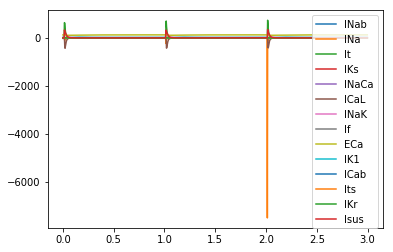

In [13]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [14]:
for aFullPN in FullPNs_for_plot:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Membrane:ECa:Value
[[0.00000000e+00 1.22874290e+02]
 [3.00000000e-03 1.23111484e+02]
 [6.01000000e-03 1.23157941e+02]
 ...
 [2.99100000e+00 1.25627451e+02]
 [2.99400000e+00 1.25628693e+02]
 [2.99700000e+00 1.25629919e+02]]
Variable:/Cell/Membrane:ICaL:Value
[[ 0.         -0.03663114]
 [ 0.003      -0.03645594]
 [ 0.00601    -0.0355599 ]
 ...
 [ 2.991      -0.0343906 ]
 [ 2.994      -0.03441656]
 [ 2.997      -0.03444248]]
Variable:/Cell/Membrane:ICab:Value
[[ 0.00000000e+00 -1.88680402e+01]
 [ 3.00000000e-03 -1.56284607e+01]
 [ 6.01000000e-03 -1.56461869e+01]
 ...
 [ 2.99100000e+00 -1.58448801e+01]
 [ 2.99400000e+00 -1.58446182e+01]
 [ 2.99700000e+00 -1.58443559e+01]]
Variable:/Cell/Membrane:IK1:Value
[[0.00000000e+00 2.23587988e+01]
 [3.00000000e-03 2.20587316e+01]
 [6.01000000e-03 2.17845522e+01]
 ...
 [2.99100000e+00 2.16951844e+01]
 [2.99400000e+00 2.17023050e+01]
 [2.99700000e+00 2.17094055e+01]]
Variable:/Cell/Membrane:IKr:Value
[[0.00000000e+00 1.39953555e-04]
 [3

In [15]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Membrane:V:Value',
]

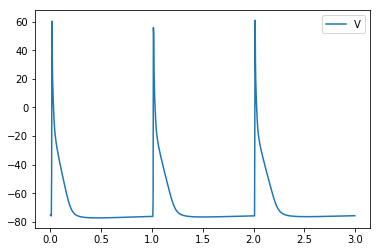

In [16]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [17]:
for aFullPN in FullPNs_for_plot:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Membrane:V:Value
[[ 0.00000000e+00 -7.53194100e+01]
 [ 3.00000000e-03 -7.55191974e+01]
 [ 6.01000000e-03 -7.56980331e+01]
 ...
 [ 2.99100000e+00 -7.57538248e+01]
 [ 2.99400000e+00 -7.57492541e+01]
 [ 2.99700000e+00 -7.57446941e+01]]


In [18]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Cytosol/ss:Ca:MolarConc',
]

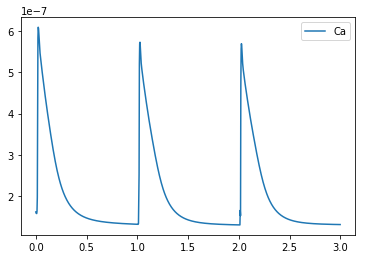

In [19]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [20]:
for aFullPN in FullPNs_for_plot:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Cytosol/ss:Ca:MolarConc
[[0.00000000e+00 1.62000000e-07]
 [3.00000000e-03 1.59112811e-07]
 [6.01000000e-03 1.58553388e-07]
 ...
 [2.99100000e+00 1.31481445e-07]
 [2.99400000e+00 1.31469065e-07]
 [2.99700000e+00 1.31456842e-07]]


In [21]:
FullPNs_INa = [ 
    'Variable:/Cell/Membrane:INa:Value',
    'Variable:/Cell/Membrane:INam:Value',
    'Variable:/Cell/Membrane:INah1:Value',
    'Variable:/Cell/Membrane:INah2:Value',
    'Variable:/Cell/Membrane:INamtau:Value',
    'Variable:/Cell/Membrane:INah1tau:Value',
    'Variable:/Cell/Membrane:INah2tau:Value',
    'Variable:/Cell/Membrane:INaminf:Value',
    'Variable:/Cell/Membrane:INahinf:Value',
]

In [22]:
for aFullPN in FullPNs_INa:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Membrane:INa:Value
[[ 0.00000000e+00 -1.32182962e-03]
 [ 3.00000000e-03 -1.27795831e-03]
 [ 6.01000000e-03 -1.19984917e-03]
 ...
 [ 2.99100000e+00 -1.18286558e-03]
 [ 2.99400000e+00 -1.18468891e-03]
 [ 2.99700000e+00 -1.18651054e-03]]
Variable:/Cell/Membrane:INam:Value
[[0.00000000e+00 2.77900000e-03]
 [3.00000000e-03 2.74596123e-03]
 [6.01000000e-03 2.68686623e-03]
 ...
 [2.99100000e+00 2.66804714e-03]
 [2.99400000e+00 2.66952899e-03]
 [2.99700000e+00 2.67100818e-03]]
Variable:/Cell/Membrane:INah1:Value
[[0.         0.90391   ]
 [0.003      0.90381901]
 [0.00601    0.9040289 ]
 ...
 [2.991      0.90904693]
 [2.994      0.90897406]
 [2.997      0.90890129]]
Variable:/Cell/Membrane:INah2:Value
[[0.         0.903967  ]
 [0.003      0.90394187]
 [0.00601    0.90399212]
 ...
 [2.991      0.90959549]
 [2.994      0.90956366]
 [2.997      0.90953087]]
Variable:/Cell/Membrane:INamtau:Value
[[0.00000000e+00 2.61248986e-05]
 [3.00000000e-03 2.60744782e-05]
 [6.01000000e-03 2.6030